This script will convert single channel masks images into RGB masks for easy visualization in GIMP

In [ ]:
import os
import glob
import numpy as np
import rasterio
from tqdm.auto import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [31]:
base_dir = '/Users/nicholaswright/Documents/gimp_segmentation_plugin/sample data'

# this folder will contain single band mask files
mask_folder = 'model output single channel'
mask_dir = os.path.join(base_dir,mask_folder)
print(os.path.isdir(mask_dir))

# this folder will contain full colour mask files
full_colour_mask_folder = 'colour mask'
colour_mask_dir = os.path.join(base_dir,full_colour_mask_folder)
Path(colour_mask_dir).mkdir(parents=True, exist_ok=True)

files = glob.glob(mask_dir+'/*')
len(files)

True


15

In [61]:
classes_file = os.path.join(base_dir,'codes.txt')
class_names = np.loadtxt(classes_file, dtype=np.str).tolist()
# or enter them manualy like this
# class_names = ["Void","Road"]
class_names


['Void', 'Road']

In [62]:
# class_count = len(class_names)

In [63]:
# 20 distinct colours, if you have more than 20 classes you will have an issue...
# from https://sashamaps.net/docs/resources/20-colors/
colour_list = [[230,  25,  75],[ 60, 180,  75],[255, 225,  25],[ 67,  99, 216],[245, 130,  49],
                [145,  30, 180],[ 70, 240, 240],[240,  50, 230],[188, 246,  12],[250, 190, 190],
                [  0, 128, 128],[230, 190, 255],[154,  99,  36],[255, 250, 200],[128,   0,   0],
                [170, 255, 195],[128, 128,   0],[255, 216, 177],[  0,   0, 117],[128, 128, 128],
                [255, 255, 255],[  0,   0,   0]]

In [87]:
names_and_colours = []
for class_name in class_names:
    colour = colour_list[class_names.index(class_name)]
    names_and_colours.append(class_name+"_"+str(colour))

In [88]:
names_and_colours

['Void_[230, 25, 75]', 'Road_[60, 180, 75]']

In [90]:
# exprot palette file for gimp
export_path = os.path.join(base_dir,'Palette.txt')
np.savetxt(export_path, np.array(names_and_colours,dtype=object), fmt='%s')
export_path

'/Users/nicholaswright/Documents/gimp_segmentation_plugin/sample data/Palette.txt'

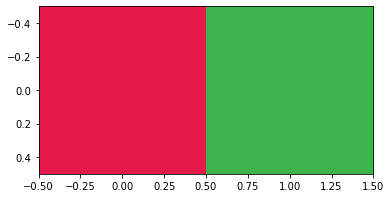

In [38]:
# these are the colours we will use
plt.imshow(np.array([rgb_display]))
plt.show()

In [39]:
# grab list of masks
mask_list = glob.glob(mask_dir+'/*')
# loop over each mask
for file in mask_list:  
#     make save path for colour image
    file_name = os.path.basename(file)
    save_path = os.path.join(colour_mask_dir,file_name)
#     open mask with rasterio
    src = rasterio.open(file)
#     grab a copy of the metadata
    meta_copy = src.meta
#     grab array
    array = src.read()
#     make empty image of correct size and 3 bands
    three_band_image = np.zeros([3,array.shape[1],array.shape[2]], dtype='uint8')
#     loop over each band
    for band in range(0,3):
#         loop over each class
        for int_class in range(0,len(class_names)):
#         get the RGB value for this channel and class
            reclas_colour = rgb_display[int_class][band]
#         pretty much doing a reclass from the mask to GRB
            three_band_image[band][np.where(array[0] == int_class )] = reclas_colour
#     edit metadata
    meta_copy['count'] = 3
    meta_copy['dtype'] = 'uint8'
#     save file out
    with rasterio.open(save_path, 'w', **meta_copy) as dst:
            dst.write(three_band_image)